In [67]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [68]:
!ls ../data/method_compare

mfqsingle_extratrees.csv       weeks_mae_elasticnet.csv
mfqsingle_mae_elasticnet.csv   weeks_mae_extratrees.csv
mfqsingle_mae_extratrees.csv   weeks_mae_linear.csv
mfqsingle_mae_linear.csv       weeks_rmse_elasticnet.csv
mfqsingle_rmse_elasticnet.csv  weeks_rmse_extratrees.csv
mfqsingle_rmse_extratrees.csv  weeks_rmse_linear.csv
mfqsingle_rmse_linear.csv


In [42]:
to_plot_linear = pd.read_csv('../data/method_compare/weeks_rmse_linear.csv')
to_plot_linear['method'] = 'elasticnet'
to_plot_linear_cis = make_to_plot_cis(to_plot_linear)

to_plot_extratrees = pd.read_csv('../data/method_compare/weeks_rmse_extratrees.csv')
to_plot_extratrees['method'] = 'extratrees'
to_plot_extratrees_cis = make_to_plot_cis(to_plot_extratrees)

to_plot_elasticnet = pd.read_csv('../data/method_compare/weeks_rmse_elasticnet.csv')
to_plot_elasticnet['method'] = 'linear'
to_plot_elasticnet_cis = make_to_plot_cis(to_plot_elasticnet)

to_plot_mae_linear = pd.read_csv('../data/method_compare/weeks_mae_linear.csv')
to_plot_mae_linear['method'] = 'elasticnet'
to_plot_mae_linear_cis = make_to_plot_cis(to_plot_mae_linear)

to_plot_mae_extratrees = pd.read_csv('../data/method_compare/weeks_mae_extratrees.csv')
to_plot_mae_extratrees['method'] = 'extratrees'
to_plot_mae_extratrees_cis = make_to_plot_cis(to_plot_mae_extratrees)

to_plot_mae_elasticnet = pd.read_csv('../data/method_compare/weeks_mae_elasticnet.csv')
to_plot_mae_elasticnet['method'] = 'linear'
to_plot_mae_elasticnet_cis = make_to_plot_cis(to_plot_mae_elasticnet)

In [54]:
# let's start with mfqsingle_rmse
to_plot_mfqsingle_linear = pd.read_csv('../data/method_compare/mfqsingle_rmse_linear.csv')
to_plot_mfqsingle_linear['method'] = 'elasticnet'
to_plot_mfqsingle_linear_cis = make_to_plot_cis(to_plot_mfqsingle_linear)

to_plot_mfqsingle_extratrees = pd.read_csv('../data/method_compare/mfqsingle_rmse_extratrees.csv')
to_plot_mfqsingle_extratrees['method'] = 'extratrees'
to_plot_mfqsingle_extratrees_cis = make_to_plot_cis(to_plot_mfqsingle_extratrees)

to_plot_mfqsingle_elasticnet = pd.read_csv('../data/method_compare/mfqsingle_rmse_elasticnet.csv')
to_plot_mfqsingle_elasticnet['method'] = 'linear'
to_plot_mfqsingle_elasticnet_cis = make_to_plot_cis(to_plot_mfqsingle_elasticnet)

to_plot_mfqsingle_mae_linear = pd.read_csv('../data/method_compare/mfqsingle_mae_linear.csv')
to_plot_mfqsingle_mae_linear['method'] = 'elasticnet'
to_plot_mfqsingle_mae_linear_cis = make_to_plot_cis(to_plot_mfqsingle_mae_linear)

to_plot_mfqsingle_mae_extratrees = pd.read_csv('../data/method_compare/mfqsingle_mae_extratrees.csv')
to_plot_mfqsingle_mae_extratrees['method'] = 'extratrees'
to_plot_mfqsingle_mae_extratrees_cis = make_to_plot_cis(to_plot_mfqsingle_mae_extratrees)

to_plot_mfqsingle_mae_elasticnet = pd.read_csv('../data/method_compare/mfqsingle_mae_elasticnet.csv')
to_plot_mfqsingle_mae_elasticnet['method'] = 'linear'
to_plot_mfqsingle_mae_elasticnet_cis = make_to_plot_cis(to_plot_mfqsingle_mae_elasticnet)

In [43]:
def make_to_plot_cis(to_plot):
    to_plot_cis = to_plot.quantile([0.0005, 0.9995]).T
    to_plot_means = to_plot.mean().T
    to_plot_cis['meanval'] = to_plot_means
    to_plot_cis = to_plot_cis.reset_index()
    to_plot_cis[0.0005] = to_plot_cis.meanval - to_plot_cis[0.0005]
    to_plot_cis[0.9995] = to_plot_cis[0.9995] - to_plot_cis.meanval
    main_difs = ['MFQ - MFQ+FH', 'Null - MFQ+FH', 'Null - MFQ', 'Null - FH']
    to_plot_cis = to_plot_cis[to_plot_cis['index'].isin(main_difs)].reset_index(drop=True)
    return to_plot_cis

In [44]:
paper_rc = {'axes.facecolor':'white',
            'figure.facecolor':'white',
            'dpi': 250}

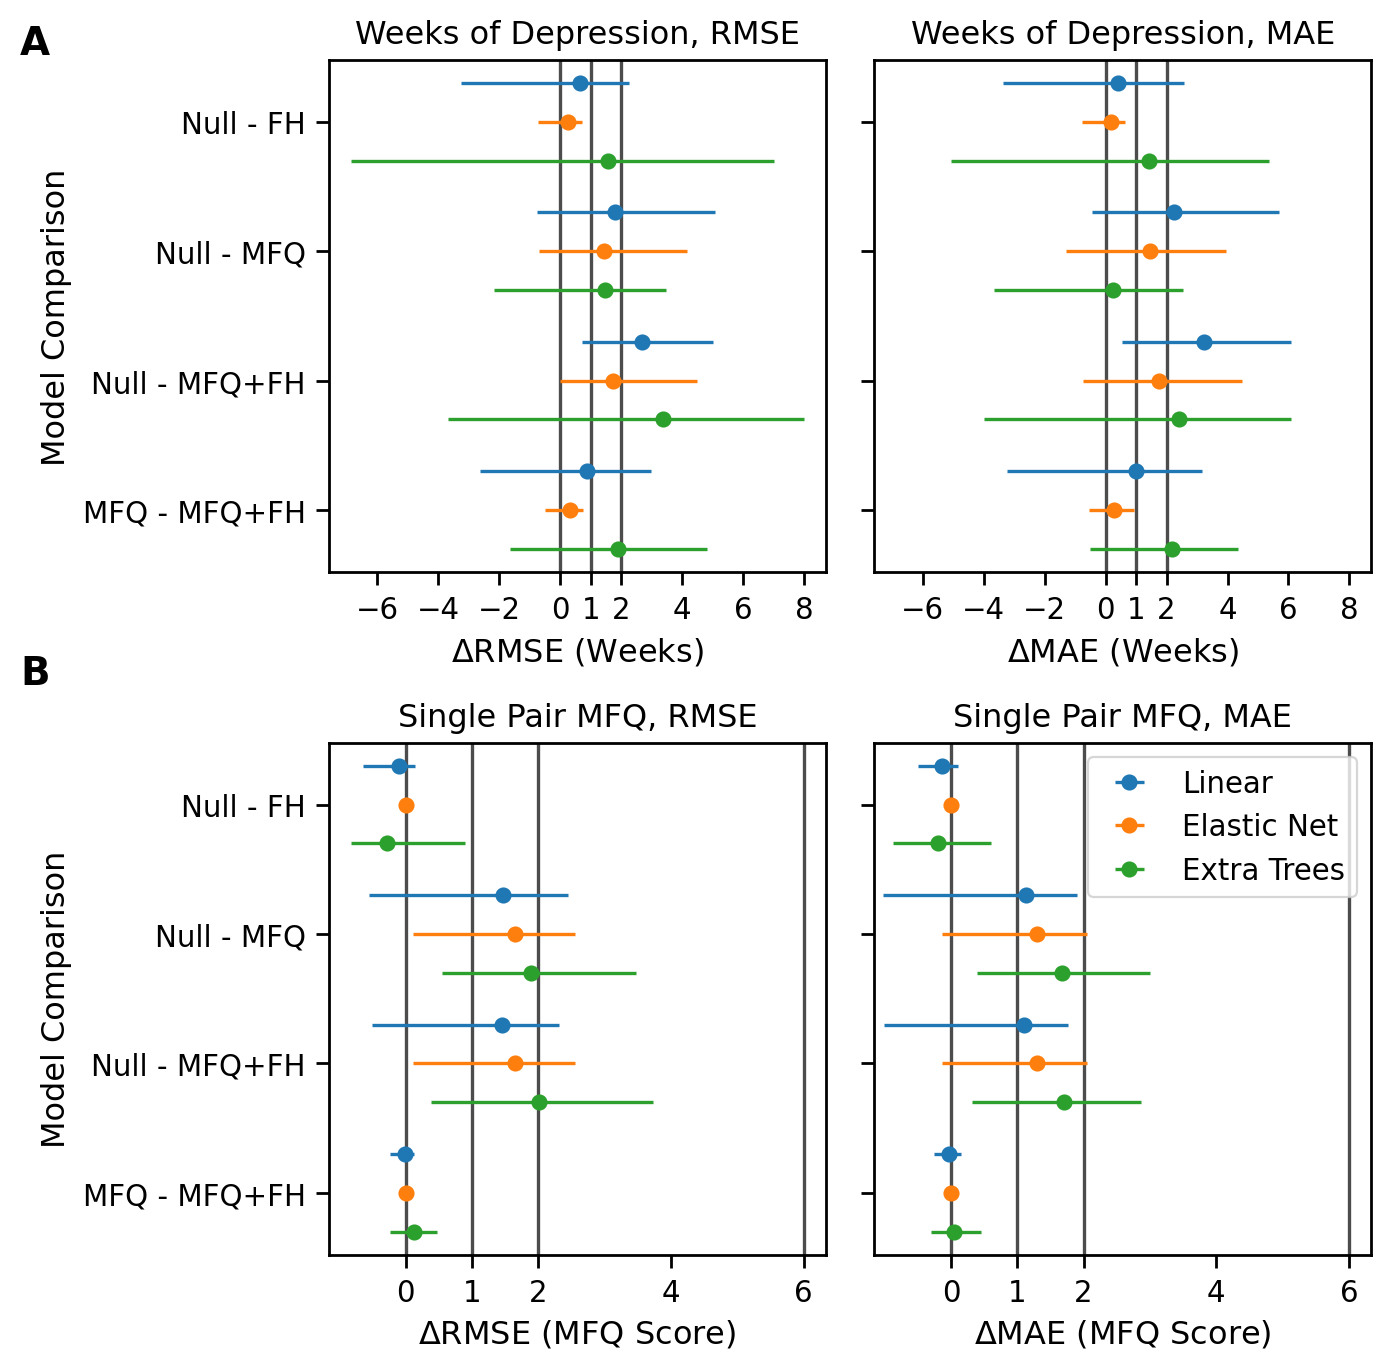

In [69]:
with sns.plotting_context("paper", font_scale=1.2, rc=paper_rc):

    fig, axes = plt.subplots(2,2, figsize=(7,7), sharex=False, dpi=200, 
                                 gridspec_kw={'width_ratios': [1, 1]})
    
    ax = axes[0,0]
    ax.errorbar(x=to_plot_linear_cis.meanval,
                xerr=to_plot_linear_cis.loc[:, [0.0005, 0.9995]].T.values,
                y=(to_plot_linear_cis.index.values + 0.3),
                fmt='o',
                label='linear')
    ax.errorbar(x=to_plot_elasticnet_cis.meanval,
                xerr=to_plot_elasticnet_cis.loc[:, [0.0005, 0.9995]].T.values,
                y= to_plot_elasticnet_cis.index.values,
                fmt='o',
                label='elasticnet')
    ax.errorbar(x=to_plot_extratrees_cis.meanval,
                xerr=to_plot_extratrees_cis.loc[:, [0.0005, 0.9995]].T.values,
                y= (to_plot_extratrees_cis.index.values - 0.3),
                fmt='o',
                label='extratrees')
    ax.set_xticks([-6, -4, -2, 0, 1, 2, 4, 6, 8])

    ax.set_yticks((to_plot_linear_cis.index.values))
    ax.set_yticklabels(to_plot_linear_cis['index'].values)
    ax.set_ylabel('Model Comparison')
    ax.set_xlabel('$\Delta$RMSE (Weeks)')
    
    ymin, ymax = ax.get_ylim()
    ax.vlines([0, 1, 2], ymin, ymax,colors='black', zorder=-10, alpha =0.7)
    ax.set_title('Weeks of Depression, RMSE')
    a_xmin, a_xmax = ax.get_xlim()
    ax.set_ylim((ymin, ymax))

    #ax.legend()
#     ax.set_ylim((ymin, ymax))
#     ax.set_ylabel('Model Comparison')
#     ax.set_xticks([0,1,3,6])

    ax = axes[0,1]
    ax.errorbar(x=to_plot_mae_linear_cis.meanval,
                xerr=to_plot_mae_linear_cis.loc[:, [0.0005, 0.9995]].T.values,
                y=(to_plot_mae_linear_cis.index.values + 0.3),
                fmt='o',
                label='linear')
    ax.errorbar(x=to_plot_mae_elasticnet_cis.meanval,
                xerr=to_plot_mae_elasticnet_cis.loc[:, [0.0005, 0.9995]].T.values,
                y= to_plot_mae_elasticnet_cis.index.values,
                fmt='o',
                label='elasticnet')
    ax.errorbar(x=to_plot_mae_extratrees_cis.meanval,
                xerr=to_plot_mae_extratrees_cis.loc[:, [0.0005, 0.9995]].T.values,
                y= (to_plot_mae_extratrees_cis.index.values - 0.3),
                fmt='o',
                label='extratrees')
    ax.set_xticks([-6, -4, -2, 0, 1, 2, 4, 6, 8])
    ax.set_xlim((a_xmin, a_xmax))
    ax.set_xlabel('$\Delta$MAE (Weeks)')
    


    ax.set_yticks((to_plot_mae_linear_cis.index.values))
    ax.set_yticklabels([])
    ymin, ymax = ax.get_ylim()
    ax.vlines([0, 1, 2], ymin, ymax,colors='black', zorder=-10, alpha =0.7)
    ax.set_title('Weeks of Depression, MAE')
    ax.set_ylim((ymin, ymax))

    ax = axes[1,0]
    ax.errorbar(x=to_plot_mfqsingle_linear_cis.meanval,
                xerr=to_plot_mfqsingle_linear_cis.loc[:, [0.0005, 0.9995]].T.values,
                y=(to_plot_mfqsingle_linear_cis.index.values + 0.3),
                fmt='o',
                label='linear')
    ax.errorbar(x=to_plot_mfqsingle_elasticnet_cis.meanval,
                xerr=to_plot_mfqsingle_elasticnet_cis.loc[:, [0.0005, 0.9995]].T.values,
                y= to_plot_mfqsingle_elasticnet_cis.index.values,
                fmt='o',
                label='elasticnet')
    ax.errorbar(x=to_plot_mfqsingle_extratrees_cis.meanval,
                xerr=to_plot_mfqsingle_extratrees_cis.loc[:, [0.0005, 0.9995]].T.values,
                y= (to_plot_mfqsingle_extratrees_cis.index.values - 0.3),
                fmt='o',
                label='extratrees')
    ax.set_xticks([-6, -4, -2, 0, 1, 2, 4, 6, 8])

    ax.set_yticks((to_plot_mfqsingle_linear_cis.index.values))
    ax.set_yticklabels(to_plot_mfqsingle_linear_cis['index'].values)
    ax.set_ylabel('Model Comparison')
 

    ymin, ymax = ax.get_ylim()
    ax.vlines([0, 1, 2, 6], ymin, ymax,colors='black', zorder=-10, alpha =0.7)
    ax.set_title('Single Pair MFQ, RMSE')
    a_xmin, a_xmax = ax.get_xlim()
    ax.set_xlabel('$\Delta$RMSE (MFQ Score)')
    ax.set_ylim((ymin, ymax))

    #ax.legend()
#     ax.set_ylim((ymin, ymax))
#     ax.set_ylabel('Model Comparison')
#     ax.set_xticks([0,1,3,6])

    ax = axes[1,1]
    ax.errorbar(x=to_plot_mfqsingle_mae_linear_cis.meanval,
                xerr=to_plot_mfqsingle_mae_linear_cis.loc[:, [0.0005, 0.9995]].T.values,
                y=(to_plot_mfqsingle_mae_linear_cis.index.values + 0.3),
                fmt='o',
                label='Linear')
    ax.errorbar(x=to_plot_mfqsingle_mae_elasticnet_cis.meanval,
                xerr=to_plot_mfqsingle_mae_elasticnet_cis.loc[:, [0.0005, 0.9995]].T.values,
                y= to_plot_mfqsingle_mae_elasticnet_cis.index.values,
                fmt='o',
                label='Elastic Net')
    ax.errorbar(x=to_plot_mfqsingle_mae_extratrees_cis.meanval,
                xerr=to_plot_mfqsingle_mae_extratrees_cis.loc[:, [0.0005, 0.9995]].T.values,
                y= (to_plot_mfqsingle_mae_extratrees_cis.index.values - 0.3),
                fmt='o',
                label='Extra Trees')
    ax.set_xticks([-6, -4, -2, 0, 1, 2, 4, 6, 8])
    ax.set_xlim((a_xmin, a_xmax))

    ax.set_yticks((to_plot_mfqsingle_mae_linear_cis.index.values))
    ax.set_yticklabels([])
    ymin, ymax = ax.get_ylim()
    ax.vlines([0, 1, 2, 6], ymin, ymax,colors='black', zorder=-10, alpha =0.7)
    ax.set_title('Single Pair MFQ, MAE')
    ax.set_xlabel('$\Delta$MAE (MFQ Score)')
    ax.set_ylim((ymin, ymax))

    ax.legend()
    fig.set_facecolor('white')
    fig.tight_layout()
    fig.text(0.01, 0.95, 'A', fontsize=14, fontweight='bold')
    fig.text(0.01, 0.5, 'B', fontsize=14, fontweight='bold')